In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [45]:
def BeemanIntegrator(a, t, x0, v0, corrector=False):
    h = t[1]-t[0]
    x = x0
    v = v0
    X_sol = np.array(x0)
    V_sol = np.array(v0)
    

    for i in range(1,len(t)):
        if i==1:
            x += h*v0
            v = v + h*a(x0,v0)
            
        else:
            x = x + h*V_sol[i-1,]+(4*a(X_sol[i-1,:],X_sol[i-1,:])-a(X_sol[i-2,:],V_sol[i-2,:]))/6*h**2

            if corrector:
                v = v + h*(5*a(X_sol[i,:],V_sol[i,:])+8*a(X_sol[i-1,:],V_sol[i-1,:])-a(X_sol[i-2,:],V_sol[i-2,:]))/12
            else:
                v = v + h*(3*a(X_sol[i-1,:],V_sol[i-1,:])-a(X_sol[i-2,:],V_sol[i-2,:]))/2
        
        X_sol = np.vstack([X_sol, x])
        V_sol = np.vstack([V_sol, v])

    return X_sol, V_sol
    

In [46]:
k = 5.  #N/m
l = 3.  #m
m = 2.  #kg
g = 9.81#m/s^2

In [47]:
def acceleration(x, v):
    dd_r = k*(l-x[0])/m + g*np.cos(x[1]) + x[0]*(v[1]**2)
    dd_theta = -g*np.sin(x[1])/x[0] - 2*v[0]*v[1]/x[0]
    
    return np.array([dd_r, dd_theta])

In [48]:
t = np.linspace(0,30,2001)
r0 = 15.   #m
theta0 = np.pi/8
d_r0 = 0.
d_theta0 = 0.

V_r0 = np.array([r0, theta0])
V_v0 = np.array([d_r0, d_theta0])

In [49]:
R_sol, V_sol = BeemanIntegrator(acceleration, t, V_r0, V_v0)

In [50]:
def ReduceSolution(solution, k = 20):
    redux = solution[0]
    for i, point in enumerate(solution[1:]):
        if i%k == 0:
            redux = np.vstack([redux, point])
            
    return redux


def ReduceTime(t, k = 20):
    redux = []
    
    for i, tt in enumerate(t):
        if i%k == 0:
            redux.append(tt)
            
    return np.array(redux)

In [51]:
RedSolution = ReduceSolution(R_sol)
RedTime = ReduceTime(t) 

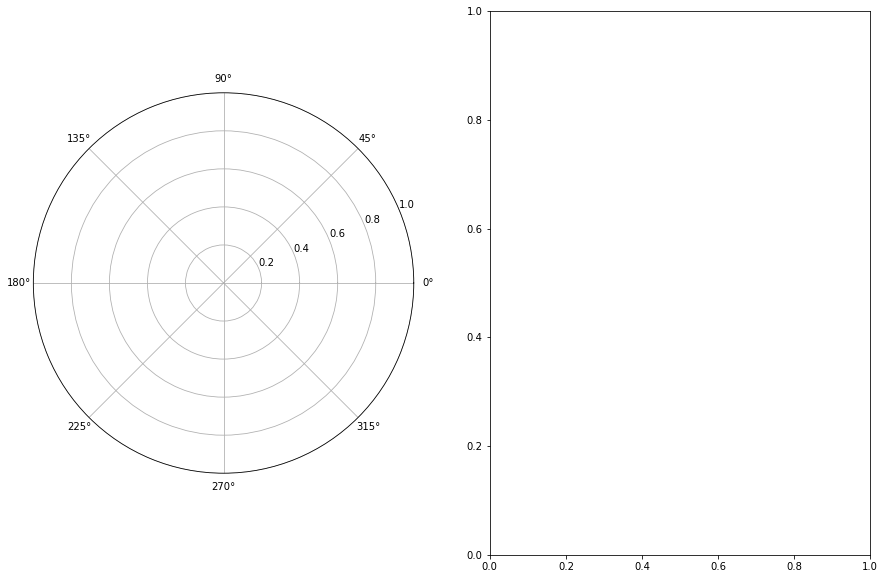

In [52]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1, projection='polar')
ax2 = fig.add_subplot(1,2,2,)

def init():
    ax2.set_xlim(-20,20)
    ax2.set_ylim(-20,20)
    ax2.grid()
    pendulo = plt.Circle((0,0), radius = 1)
    ax2.add_patch(pendulo)
    ax2.axis('equal')

def update_plot(i):
    ax2.clear()
    init()

    point = RedSolution[i]
    r = point[0]
    theta = point[1]
    
    
    x = r*np.cos(theta-np.pi/2)
    y= r* np.sin(theta-np.pi/2)
    print(x,y)

    ax1.scatter(theta,r)
    ax2.scatter(x,y, marker='.', color='paleturquoise')
    ax2.set_title(r'$t=$ %0.2f seconds' % (RedTime[i]))
    
    linea = plt.Arrow(0,0,x,y)
    ax2.add_patch(linea)

In [ ]:
num_frames = len(RedTime)
anim = animation.FuncAnimation(fig, update_plot, frames=num_frames)
anim.save('pendulo.gif', fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.


5.740251485476348 -13.858192987669302
5.740251485476348 -13.858192987669302
5.740251485476348 -13.858192987669302
5.156196602695249 -13.007298616551282
3.6900358663230426 -10.757194256148773
1.648651326746098 -7.609481429377653
-0.5799441838829359 -4.284229240916757
-2.787390649882242 -1.548022818201986
-4.978431832822669 0.2595237283094847
-6.784563654690465 1.0821669515850245
-7.770933832804178 0.8572372810829891
-7.677042879601178 -0.3687401919838567
-6.488766334758449 -2.3993254037192417
-4.412380496364015 -4.954519117974686
-1.757229834972846 -7.710134852169672
1.110845107147135 -10.22847404812908
3.7573974828145933 -12.013033618844718
5.737661240098345 -12.663528810656823
6.707338841130384 -12.007799698234232
6.51817908352599 -10.15666402248314
5.2607258509958115 -7.484864979267534
3.2471715607422573 -4.551896528468262
0.940583454495868 -1.9841129782394185
-1.302460492278795 -0.42434067188681884
-3.740180170690071 -0.09793300845145411
-6.022251403434943 -0.732347768097268
-7.6100